In [1]:
"""Wisconsin
---------
Election results and precinct shapefile from Wisconsin State Legislature Open Data Portal (https://data-ltsb.opendata.arcgis.com/)

The following counties were revised with the voting district shapefiles from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release: Buffalo, Clark, Dunn, Grant, La Crosse, Marquette, Pepin, Trempealeau.

G18USSRVUK - Leah Vukmir (Republican Party)
G18USSDBAL - Tammy Baldwin (Democratic Party)
G18USSOWRI - Write-in Votes

G18GOVRWAL - Scott Walker (Republican Party)
G18GOVDEVE - Tony Evers (Democratic Party)
G18GOVLAND - Phillip Anderson (Libertarian Party)
G18GOVGWHI - Michael J. White (Wisconsin Green Party)
G18GOVITUR - Maggie Turnbull (Independent)
G18GOVIENZ - Arnie Enz (Independent)
G18GOVOWRI - Write-in Votes

G18SOSRSCH - Jay Schroeder (Republican Party)
G18SOSDLAF - Doug La Follette (Democratic Party)
G18SOSOWRI - Write-in Votes

G18TRERHAR - Travis Hartwig (Republican Party)
G18TREDGOD - Sarah Godlewski (Democratic Party)
G18TRECZUE - Andrew Zuelke (Constitution Party)
G18TREOWRI - Write-in Votes

G18ATGRSCH - Brad Schimel (Republican Party)
G18ATGDKAU - Josh Kaul (Democratic Party)
G18ATGCLAR - Terry Larson (Constitution Party)
G18ATGOWRI - Write-in Votes

"""

"Wisconsin\n---------\nElection results and precinct shapefile from Wisconsin State Legislature Open Data Portal (https://data-ltsb.opendata.arcgis.com/)\n\nThe following counties were revised with the voting district shapefiles from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release: Buffalo, Clark, Dunn, Grant, La Crosse, Marquette, Pepin, Trempealeau.\n\nG18USSRVUK - Leah Vukmir (Republican Party)\nG18USSDBAL - Tammy Baldwin (Democratic Party)\nG18USSOWRI - Write-in Votes\n\nG18GOVRWAL - Scott Walker (Republican Party)\nG18GOVDEVE - Tony Evers (Democratic Party)\nG18GOVLAND - Phillip Anderson (Libertarian Party)\nG18GOVGWHI - Michael J. White (Wisconsin Green Party)\nG18GOVITUR - Maggie Turnbull (Independent)\nG18GOVIENZ - Arnie Enz (Independent)\nG18GOVOWRI - Write-in Votes\n\nG18SOSRSCH - Jay Schroeder (Republican Party)\nG18SOSDLAF - Doug La Follette (Democratic Party)\nG18SOSOWRI - Write-in Votes\n\nG18TRERHAR - Travis Hartwig (Republican Party)\nG18TREDGOD

In [51]:
import matplotlib.pyplot as plt # for plotting maps
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import statistics
import timeit 
import requests

In [52]:
##Read in the final shapefile from VEST

final = gp.read_file('./final/wi_2018/wi_2018.shp')

In [53]:
#Read in the raw wards file from the Wisconsin Legislature
raw_wards = gp.read_file('./raw-data/2012-2018_Election_Data_with_2020_Wards-shp/2012-2018_Election_Data_with_2020_Wards.shp')

In [54]:
##Before fixing the geographies below, match the fields to ensure that everything is matching up to the final from the raw (right variables, etc)
#Check column names
final.columns

Index(['OBJECTID_1', 'CNTY_FIPS', 'CNTY_NAME', 'COUSUBFP', 'MCD_FIPS',
       'MCD_NAME', 'WARDID', 'LABEL', 'ASM', 'SEN', 'CON', 'PERSONS',
       'PERSONS18', 'WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMINDIAN',
       'PISLAND', 'OTHER', 'OTHERMLT', 'WHITE18', 'BLACK18', 'HISPANIC18',
       'ASIAN18', 'AMINDIAN18', 'PISLAND18', 'OTHER18', 'OTHERMLT18',
       'G18USSRVUK', 'G18USSDBAL', 'G18USSOWRI', 'G18GOVRWAL', 'G18GOVDEVE',
       'G18GOVLAND', 'G18GOVGWHI', 'G18GOVITUR', 'G18GOVIENZ', 'G18GOVOWRI',
       'G18SOSRSCH', 'G18SOSDLAF', 'G18SOSOWRI', 'G18TRERHAR', 'G18TREDGOD',
       'G18TRECZUE', 'G18TREOWRI', 'G18ATGRSCH', 'G18ATGDKAU', 'G18ATGCLAR',
       'G18ATGOWRI', 'geometry'],
      dtype='object')

In [55]:
##Check the column names for the raw file
raw_wards.columns

Index(['OBJECTID', 'GEOID', 'CNTY_FIPS', 'CNTY_NAME', 'COUSUBFP', 'MCD_FIPS',
       'MCD_NAME', 'CTV', 'LABEL', 'LSAD',
       ...
       'WSASCT12', 'WSSTOT12', 'WSSDEM12', 'WSSREP12', 'WSSREP212', 'WSSCON12',
       'WSSIND12', 'WSSSCT12', 'WSSAME12', 'geometry'],
      dtype='object', length=240)

In [56]:
"""There are a lot more fields in the raw data than in the final
We need to see where the data overlaps and what fields come from which.
All of the numbers should match, as the geography replacement does not include 
any electoral data."""
#Look at the full head and column names of the raw data
pd.set_option('display.max_columns', None)#to view all columns in head
raw_wards.head()

,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,NAME,DISTRICT,ASM,SEN,CON,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,GOVTOT18,GOVREP18,GOVDEM18,GOVLIB18,GOVIND18,GOVIND218,GOVIND318,GOVREP218,GOVDEM218,GOVCON18,GOVDEM318,GOVIND418,GOVIND518,GOVDEM418,GOVDEM518,GOVSCT18,SOSTOT18,SOSREP18,SOSDEM18,SOSGRN18,SOSSCT18,TRSTOT18,TRSREP18,TRSDEM18,TRSCON18,TRSSCT18,USHTOT18,USHREP18,USHDEM18,USHIND18,USHIND218,USHDEM218,USHSCT18,USSTOT18,USSREP18,USSDEM18,USSIND18,USSSCT18,USSIND218,WAGTOT18,WAGREP18,WAGDEM18,WAGCON18,WAGSCT18,WSATOT18,WSAREP18,WSADEM18,WSAIND18,WSALIB18,WSASCT18,WSACON18,WSAREP218,WSSTOT18,WSSREP18,WSSDEM18,WSSSCT18,WSSIND18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVIND14,GOVIND214,GOVIND314,GOVREP214,GOVCON14,GOVIND414,GOVIND514,GOVREP314,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHIND14,USHREP214,USHIND214,USHSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAIND14,WSAREP214,WSASCT14,WSSTOT14,WSSDEM14,WSSREP14,WSSIND14,WSSSCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,Adams,41,41,14,3,0001,661.0,484.0,620.0,17.0,15.0,1.0,5.0,0.0,0.0,3.0,463.0,9.0,8.0,1.0,3.0,0.0,0.0,0.0,228.0,120.0,99.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,218.0,110.0,108.0,0.0,0.0,217.0,106.0,102.0,9.0,0.0,220.0,100.0,120.0,0.0,0.0,0.0,0.0,223.0,103.0,119.0,0.0,1.0,0.0,222.0,114.0,102.0,6.0,0.0,220.0,125.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.0,0.0,0.0,180.0,3.0,258.0,110.0,127.0,3.0,6.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,164.0,162.0,0.0,0.0,0.0,0.0,0.0,2.0,245.0,111.0,116.0,0.0,18.0,0.0,217.0,0.0,126.0,0.0,91.0,0.0,227.0,121.0,106.0,0.0,0.0,193.0,101.0,85.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,106.0,65.0,4.0,5.0,0.0,174.0,91.0,70.0,3.0,6.0,4.0,0.0,179.0,109.0,70.0,0.0,0.0,0.0,0.0,182.0,94.0,81.0,7.0,0.0,181.0,94.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0,191.0,2.0,216.0,104.0,95.0,15.0,2.0,272.0,168.0,101.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,237.0,150.0,86.0,0.0,1.0,262.0,148.0,99.0,0.0,11.0,3.0,0.0,1.0,232.0,140.0,0.0,92.0,0.0,0.0,0.0,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,"POLYGON ((-9999584.655 5460311.612, -9999584.6..."
1,2,55001002750002,55001,Adams,00275,5500100275,Adams,C,Adams - C 0002,25,Adams,41,41,14,3,0002,652.0,463.0,599.0,6.0,23.0,10.0,12.0,0.0,2.0,0.0,435.0,4.0,7.0,7.0,8.0,0.0,2.0,0.0,219.0,118.0,97.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,109.0,107.0,0.0,0.0,212.0,104.0,99.0,9.0,0.0,215.0,98.0,117.0,0.0,0.0,0.0,0.0,218.0,101.0,117.0,0.0,0.0,0.0,214.0,111.0,99.0,4.0,0.0,214.0,122.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,0.0,0.0,0.0,177.0,1.0,241.0,107.0,124.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,160.0,159.0,0.0,0.0,0.0,0.0,0.0,1.0,239.0,109.0,113.0,0.0,17.0,0.0,212.0,0.0,123.0,0.0,89.0,0.

In [57]:
#Also look at the final data to compare, and see how the variables were derived.
final.head()

,OBJECTID_1,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,WARDID,LABEL,ASM,SEN,CON,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G18USSRVUK,G18USSDBAL,G18USSOWRI,G18GOVRWAL,G18GOVDEVE,G18GOVLAND,G18GOVGWHI,G18GOVITUR,G18GOVIENZ,G18GOVOWRI,G18SOSRSCH,G18SOSDLAF,G18SOSOWRI,G18TRERHAR,G18TREDGOD,G18TRECZUE,G18TREOWRI,G18ATGRSCH,G18ATGDKAU,G18ATGCLAR,G18ATGOWRI,geometry
0,1,55001,ADAMS,00275,5500100275,Adams,0001,Adams - C 0001,41,14,3,661,484,620,17,15,1,5,0,0,3,463,9,8,1,3,0,0,0,103,119,1,120,99,3,2,2,1,1,110,108,0,106,102,9,0,114,102,6,0,"POLYGON ((-89.82778 43.96682, -89.82778 43.966..."
1,2,55001,ADAMS,00275,5500100275,Adams,0002,Adams - C 0002,41,14,3,652,463,599,6,23,10,12,0,2,0,435,4,7,7,8,0,2,0,101,117,0,118,97,1,1,2,0,0,109,107,0,104,99,9,0,111,99,4,0,"POLYGON ((-89.80942 43.95236, -89.81333 43.952..."
2,3,55001,ADAMS,00275,5500100275,Adams,0003,Adams - C 0003,41,14,3,288,241,278,6,3,0,1,0,0,0,234,4,2,0,1,0,0,0,45,52,1,52,44,1,1,1,1,1,48,47,0,46,44,4,0,50,44,3,0,"POLYGON ((-89.79772 43.96676, -89.79771 43.965..."
3,4,55001,ADAMS,00275,5500100275,Adams,0004,Adams - C 0004,41,14,3,366,306,350,2,5,2,5,0,1,1,298,1,2,2,2,0,0,1,56,65,0,66,54,1,0,0,0,0,60,59,0,58,56,4,0,62,56,2,0,"POLYGON ((-89.81786 43.96681, -89.81777 43.964..."
4,5,55001,ADAMS,00300,5500100300,ADAMS,0001,Adams - T 0001,41,14,3,902,736,847,2,38,2,11,0,1,1,704,2,21,2,5,0,1,1,212,190,0,239,156,6,4,2,0,0,223,164,0,218,155,14,0,231,155,8,0,"POLYGON ((-89.71669 43.89442, -89.71699 43.894..."


In [58]:
"""Next, we know that some of the columns have the same name for demographic
data. We should check the sums on the data to ensure that they are the same."""
#these new variables all represent the difference in total sums between the two datasets
d_persons = abs(sum(raw_wards.PERSONS)-sum(final.PERSONS))
d_persons18 = abs(sum(raw_wards.PERSONS18)-sum(final.PERSONS18))
d_white = abs(sum(raw_wards.WHITE)-sum(final.WHITE))
d_black = abs(sum(raw_wards.BLACK)-sum(final.BLACK))
d_hispanic = abs(sum(raw_wards.HISPANIC)-sum(final.HISPANIC))
d_asian = abs(sum(raw_wards.ASIAN)-sum(final.ASIAN))
d_amindian = abs(sum(raw_wards.AMINDIAN)-sum(final.AMINDIAN))
d_pisland = abs(sum(raw_wards.PISLAND)-sum(final.PISLAND))
d_other = abs(sum(raw_wards.OTHER)-sum(final.OTHER))
d_othermlt = abs(sum(raw_wards.OTHERMLT)-sum(final.OTHERMLT))
d_white18 = abs(sum(raw_wards.WHITE18)-sum(final.WHITE18))
d_black18 = abs(sum(raw_wards.BLACK18)-sum(final.BLACK18))
d_hispanic18 = abs(sum(raw_wards.HISPANIC18)-sum(final.HISPANIC18))
d_asian18 = abs(sum(raw_wards.ASIAN18)-sum(final.ASIAN18))
d_amindian18 = abs(sum(raw_wards.AMINDIAN18)-sum(final.AMINDIAN18))
d_pisland18 = abs(sum(raw_wards.PISLAND18)-sum(final.PISLAND18))
d_other18 = abs(sum(raw_wards.OTHER18)-sum(final.OTHER18))
d_othermlt18 = abs(sum(raw_wards.OTHERMLT18)-sum(final.OTHERMLT18))
print("Differences for each column: ", d_persons, d_persons18, d_white, d_black, d_hispanic, d_asian, d_amindian, d_pisland, d_other, d_othermlt, d_white18, d_black18, d_hispanic18, d_asian18, d_amindian18, d_pisland18, d_other18, d_othermlt18)





Differences for each column:  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan


In [59]:
"""All of the values above should read zero. 
This means nothing was changed between the raw and final values.
We now need to deal with the election results. Some columns appeaer
to line up nicely and we can test this with summing the columns again.
The only difference appears to be the ones that VEST designates as write in candidates.
In order to know what the fields are referring to, we must look at the documentation.txt 
file from VEST (in first line of code), and the documentation from 
the Wisconsin Legislature, which is included in the raw-data folder"""
#Test all of the election totals for each non-write in candidate that is in the final file
d_senateR = abs(sum(raw_wards.USSREP18)-sum(final.G18USSRVUK))
d_senateD = abs(sum(raw_wards.USSDEM18)-sum(final.G18USSDBAL))
d_govR = abs(sum(raw_wards.GOVREP18)-sum(final.G18GOVRWAL))
d_govD = abs(sum(raw_wards.GOVDEM18)-sum(final.G18GOVDEVE))
d_govLib = abs(sum(raw_wards.GOVLIB18)-sum(final.G18GOVLAND))
d_govGreen = abs(sum(raw_wards.GOVIND18)-sum(final.G18GOVGWHI))
d_govInd1 = abs(sum(raw_wards.GOVIND218)-sum(final.G18GOVITUR))
d_govInd2 = abs(sum(raw_wards.GOVIND318)-sum(final.G18GOVIENZ))
d_sosR = abs(sum(raw_wards.SOSREP18)-sum(final.G18SOSRSCH))
d_sosD = abs(sum(raw_wards.SOSDEM18)-sum(final.G18SOSDLAF))
d_treR = abs(sum(raw_wards.TRSREP18)-sum(final.G18TRERHAR))
d_treD = abs(sum(raw_wards.TRSDEM18)-sum(final.G18TREDGOD))
d_treC = abs(sum(raw_wards.TRSCON18)-sum(final.G18TRECZUE))
d_agR = abs(sum(raw_wards.WAGREP18)-sum(final.G18ATGRSCH))
d_agD = abs(sum(raw_wards.WAGDEM18)-sum(final.G18ATGDKAU))
d_agC = abs(sum(raw_wards.WAGCON18)-sum(final.G18ATGCLAR))


print("Differences for each column: ", d_senateR, d_senateD, d_govR, d_govD, d_govLib, d_govGreen, d_govInd1, d_govInd2, d_sosR, d_sosD, d_treR, d_treD, d_treC, d_agR, d_agD, d_agC)

Differences for each column:  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan


In [60]:
"""Since this data appears good, we can rename these fields
to reflect what is in the final data."""
col_dict = {'OBJECTID':'OBJECTID_1','WARD_ID':'WARDID','USSREP18':'G18USSRVUK', 'USSDEM18':'G18USSDBAL','GOVREP18':'G18GOVRWAL','GOVDEM18': 'G18GOVDEVE','GOVLIB18':'G18GOVLAND','GOVIND18':'G18GOVGWHI','GOVIND218':'G18GOVITUR','GOVIND318':'G18GOVIENZ','SOSREP18':'G18SOSRSCH','SOSDEM18':'G18SOSDLAF','TRSREP18':'G18TRERHAR','TRSDEM18':'G18TREDGOD','TRSCON18':'G18TRECZUE','WAGREP18':'G18ATGRSCH','WAGDEM18':'G18ATGDKAU','WAGCON18':'G18ATGCLAR'}
wards = raw_wards.rename(col_dict, axis=1)
wards.head()

,OBJECTID_1,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,NAME,DISTRICT,ASM,SEN,CON,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,GOVTOT18,G18GOVRWAL,G18GOVDEVE,G18GOVLAND,G18GOVGWHI,G18GOVITUR,G18GOVIENZ,GOVREP218,GOVDEM218,GOVCON18,GOVDEM318,GOVIND418,GOVIND518,GOVDEM418,GOVDEM518,GOVSCT18,SOSTOT18,G18SOSRSCH,G18SOSDLAF,SOSGRN18,SOSSCT18,TRSTOT18,G18TRERHAR,G18TREDGOD,G18TRECZUE,TRSSCT18,USHTOT18,USHREP18,USHDEM18,USHIND18,USHIND218,USHDEM218,USHSCT18,USSTOT18,G18USSRVUK,G18USSDBAL,USSIND18,USSSCT18,USSIND218,WAGTOT18,G18ATGRSCH,G18ATGDKAU,G18ATGCLAR,WAGSCT18,WSATOT18,WSAREP18,WSADEM18,WSAIND18,WSALIB18,WSASCT18,WSACON18,WSAREP218,WSSTOT18,WSSREP18,WSSDEM18,WSSSCT18,WSSIND18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVIND14,GOVIND214,GOVIND314,GOVREP214,GOVCON14,GOVIND414,GOVIND514,GOVREP314,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHIND14,USHREP214,USHIND214,USHSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAIND14,WSAREP214,WSASCT14,WSSTOT14,WSSDEM14,WSSREP14,WSSIND14,WSSSCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,Adams,41,41,14,3,0001,661.0,484.0,620.0,17.0,15.0,1.0,5.0,0.0,0.0,3.0,463.0,9.0,8.0,1.0,3.0,0.0,0.0,0.0,228.0,120.0,99.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,218.0,110.0,108.0,0.0,0.0,217.0,106.0,102.0,9.0,0.0,220.0,100.0,120.0,0.0,0.0,0.0,0.0,223.0,103.0,119.0,0.0,1.0,0.0,222.0,114.0,102.0,6.0,0.0,220.0,125.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.0,0.0,0.0,180.0,3.0,258.0,110.0,127.0,3.0,6.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,164.0,162.0,0.0,0.0,0.0,0.0,0.0,2.0,245.0,111.0,116.0,0.0,18.0,0.0,217.0,0.0,126.0,0.0,91.0,0.0,227.0,121.0,106.0,0.0,0.0,193.0,101.0,85.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,106.0,65.0,4.0,5.0,0.0,174.0,91.0,70.0,3.0,6.0,4.0,0.0,179.0,109.0,70.0,0.0,0.0,0.0,0.0,182.0,94.0,81.0,7.0,0.0,181.0,94.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0,191.0,2.0,216.0,104.0,95.0,15.0,2.0,272.0,168.0,101.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,237.0,150.0,86.0,0.0,1.0,262.0,148.0,99.0,0.0,11.0,3.0,0.0,1.0,232.0,140.0,0.0,92.0,0.0,0.0,0.0,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,"POLYGON ((-9999584.655 5460311.612, -9999584.6..."
1,2,55001002750002,55001,Adams,00275,5500100275,Adams,C,Adams - C 0002,25,Adams,41,41,14,3,0002,652.0,463.0,599.0,6.0,23.0,10.0,12.0,0.0,2.0,0.0,435.0,4.0,7.0,7.0,8.0,0.0,2.0,0.0,219.0,118.0,97.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,109.0,107.0,0.0,0.0,212.0,104.0,99.0,9.0,0.0,215.0,98.0,117.0,0.0,0.0,0.0,0.0,218.0,101.0,117.0,0.0,0.0,0.0,214.0,111.0,99.0,4.0,0.0,214.0,122.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,0.0,0.0,0.0,177.0,1.0,241.0,107.0,124.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,160.0,159.0,0.0,0.0,0.0,0.0,0.0,1.0,239.0,109.0,113.0,0.0,17.0

In [61]:
"""We now need to calculate the 'write-in' values. After examining the values
in the full header above, it looks like VEST summed all of the other candidates
which they didn't designate a field for into a new column"""
#Calculate totals for other candidates in the races.
#Senate race
senate_other1 = sum(wards.USSSCT18) 
senate_other2 = sum(wards.USSIND18)
senate_other3 = sum(wards.USSIND218)
senate_other = senate_other1 + senate_other2 + senate_other3
gov_other1 = sum(wards.GOVREP218)
gov_other2 = sum(wards.GOVDEM218)
gov_other3 = sum(wards.GOVCON18)
gov_other4 = sum(wards.GOVDEM318)
gov_other5 = sum(wards.GOVIND418)
gov_other6 = sum(wards.GOVIND518)
gov_other7 = sum(wards.GOVDEM418)
gov_other8 = sum(wards.GOVDEM518)
gov_other9 = sum(wards.GOVSCT18)
gov_other = gov_other1+gov_other2+gov_other3+gov_other4+gov_other5+gov_other6+gov_other7+gov_other8+gov_other9
sos_other1 = sum(wards.SOSGRN18)
sos_other2 = sum(wards.SOSSCT18)
sos_other = sos_other1+sos_other2
tre_other = sum(wards.TRSSCT18)
ag_other = sum(wards.WAGSCT18)
print("senate other: ", senate_other, "governor other: ", gov_other, "sos other: ", sos_other, "treasurer other: ", "attorney genereal other: ", ag_other)

senate other:  nan governor other:  nan sos other:  nan treasurer other:  attorney genereal other:  nan


In [62]:
"""Compare these summed values across the candidates to the 
'write-in' candidates in the VEST dataset"""
d_senate_other = abs(senate_other-sum(final.G18USSOWRI))
d_gov_other = abs(gov_other-sum(final.G18GOVOWRI))
d_sos_other = abs(sos_other-sum(final.G18SOSOWRI))
d_tre_other = abs(tre_other-sum(final.G18TREOWRI))
d_ag_other = abs(ag_other-sum(final.G18ATGOWRI))
print("Differences between the raw and final 'write-in' counts: ", d_senate_other, d_gov_other, d_sos_other, d_tre_other, d_ag_other)

Differences between the raw and final 'write-in' counts:  nan nan nan nan nan


In [63]:
"""All of the electoral and demogrpahic data now matches.
Add the new columns of the summed data for write-ins with
the appropriate names."""
wards['G18USSOWRI'] = wards['USSSCT18']+wards['USSIND18']+wards['USSIND218']
wards['G18GOVOWRI'] = wards['GOVREP218'] + wards['GOVDEM218']+wards['GOVCON18']+wards['GOVDEM318']+wards['GOVIND418']+wards['GOVIND518']+wards['GOVDEM418']+wards['GOVDEM518']+wards['GOVSCT18']
wards['G18SOSOWRI'] = wards['SOSGRN18']+wards['SOSSCT18']
wards['G18TREOWRI']=wards['TRSSCT18']
wards['G18ATGOWRI']=wards['WAGSCT18']

In [67]:
##change back from STR_WARDS to WARDID

,OBJECTID_1,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,NAME,DISTRICT,ASM,SEN,CON,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,GOVTOT18,G18GOVRWAL,G18GOVDEVE,G18GOVLAND,G18GOVGWHI,G18GOVITUR,G18GOVIENZ,GOVREP218,GOVDEM218,GOVCON18,GOVDEM318,GOVIND418,GOVIND518,GOVDEM418,GOVDEM518,GOVSCT18,SOSTOT18,G18SOSRSCH,G18SOSDLAF,SOSGRN18,SOSSCT18,TRSTOT18,G18TRERHAR,G18TREDGOD,G18TRECZUE,TRSSCT18,USHTOT18,USHREP18,USHDEM18,USHIND18,USHIND218,USHDEM218,USHSCT18,USSTOT18,G18USSRVUK,G18USSDBAL,USSIND18,USSSCT18,USSIND218,WAGTOT18,G18ATGRSCH,G18ATGDKAU,G18ATGCLAR,WAGSCT18,WSATOT18,WSAREP18,WSADEM18,WSAIND18,WSALIB18,WSASCT18,WSACON18,WSAREP218,WSSTOT18,WSSREP18,WSSDEM18,WSSSCT18,WSSIND18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVIND14,GOVIND214,GOVIND314,GOVREP214,GOVCON14,GOVIND414,GOVIND514,GOVREP314,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHIND14,USHREP214,USHIND214,USHSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAIND14,WSAREP214,WSASCT14,WSSTOT14,WSSDEM14,WSSREP14,WSSIND14,WSSSCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry,G18USSOWRI,G18GOVOWRI,G18SOSOWRI,G18TREOWRI,G18ATGOWRI
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,Adams,41,41,14,3,0001,661.0,484.0,620.0,17.0,15.0,1.0,5.0,0.0,0.0,3.0,463.0,9.0,8.0,1.0,3.0,0.0,0.0,0.0,228.0,120.0,99.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,218.0,110.0,108.0,0.0,0.0,217.0,106.0,102.0,9.0,0.0,220.0,100.0,120.0,0.0,0.0,0.0,0.0,223.0,103.0,119.0,0.0,1.0,0.0,222.0,114.0,102.0,6.0,0.0,220.0,125.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.0,0.0,0.0,180.0,3.0,258.0,110.0,127.0,3.0,6.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,164.0,162.0,0.0,0.0,0.0,0.0,0.0,2.0,245.0,111.0,116.0,0.0,18.0,0.0,217.0,0.0,126.0,0.0,91.0,0.0,227.0,121.0,106.0,0.0,0.0,193.0,101.0,85.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,106.0,65.0,4.0,5.0,0.0,174.0,91.0,70.0,3.0,6.0,4.0,0.0,179.0,109.0,70.0,0.0,0.0,0.0,0.0,182.0,94.0,81.0,7.0,0.0,181.0,94.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0,191.0,2.0,216.0,104.0,95.0,15.0,2.0,272.0,168.0,101.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,237.0,150.0,86.0,0.0,1.0,262.0,148.0,99.0,0.0,11.0,3.0,0.0,1.0,232.0,140.0,0.0,92.0,0.0,0.0,0.0,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,"POLYGON ((-9999584.655 5460311.612, -9999584.6...",1.0,1.0,0.0,0.0,0.0
1,2,55001002750002,55001,Adams,00275,5500100275,Adams,C,Adams - C 0002,25,Adams,41,41,14,3,0002,652.0,463.0,599.0,6.0,23.0,10.0,12.0,0.0,2.0,0.0,435.0,4.0,7.0,7.0,8.0,0.0,2.0,0.0,219.0,118.0,97.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,109.0,107.0,0.0,0.0,212.0,104.0,99.0,9.0,0.0,215.0,98.0,117.0,0.0,0.0,0.0,0.0,218.0,101.0,117.0,0.0,0.0,0.0,214.0,111.0,99.0,4.0,0.0,214.0,122.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,0.0,0.0,0.0,177.0,1.0,241.0,107.0,124.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [68]:
"""Now we need to subset particular columns in the wards file
to match the columns count and names in the final VEST file."""
wards_subset = wards[['OBJECTID_1', 'CNTY_FIPS', 'CNTY_NAME', 'COUSUBFP',
                    'MCD_FIPS', 'MCD_NAME', 'STR_WARDS', 'LABEL',
                    'ASM','SEN','CON','PERSONS','PERSONS18','WHITE',
                    'BLACK', 'HISPANIC', 'ASIAN', 'AMINDIAN', 'PISLAND',
                    'OTHER','OTHERMLT', 'WHITE18','BLACK18','HISPANIC18',
                    'ASIAN18','AMINDIAN18','PISLAND18','OTHER18',
                    'OTHERMLT18','G18USSRVUK','G18USSDBAL','G18USSOWRI',
                    'G18GOVRWAL','G18GOVDEVE','G18GOVLAND','G18GOVGWHI',
                    'G18GOVITUR','G18GOVIENZ','G18GOVOWRI','G18SOSRSCH',
                    'G18SOSDLAF','G18SOSOWRI','G18TRERHAR','G18TREDGOD',
                    'G18TRECZUE','G18TREOWRI','G18ATGRSCH','G18ATGDKAU',
                    'G18ATGCLAR','G18ATGOWRI','geometry']]
wards_subset.head()

,OBJECTID_1,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,STR_WARDS,LABEL,ASM,SEN,CON,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G18USSRVUK,G18USSDBAL,G18USSOWRI,G18GOVRWAL,G18GOVDEVE,G18GOVLAND,G18GOVGWHI,G18GOVITUR,G18GOVIENZ,G18GOVOWRI,G18SOSRSCH,G18SOSDLAF,G18SOSOWRI,G18TRERHAR,G18TREDGOD,G18TRECZUE,G18TREOWRI,G18ATGRSCH,G18ATGDKAU,G18ATGCLAR,G18ATGOWRI,geometry
0,1,55001,Adams,00275,5500100275,Adams,0001,Adams - C 0001,41,14,3,661.0,484.0,620.0,17.0,15.0,1.0,5.0,0.0,0.0,3.0,463.0,9.0,8.0,1.0,3.0,0.0,0.0,0.0,103.0,119.0,1.0,120.0,99.0,3.0,2.0,2.0,1.0,1.0,110.0,108.0,0.0,106.0,102.0,9.0,0.0,114.0,102.0,6.0,0.0,"POLYGON ((-9999584.655 5460311.612, -9999584.6..."
1,2,55001,Adams,00275,5500100275,Adams,0002,Adams - C 0002,41,14,3,652.0,463.0,599.0,6.0,23.0,10.0,12.0,0.0,2.0,0.0,435.0,4.0,7.0,7.0,8.0,0.0,2.0,0.0,101.0,117.0,0.0,118.0,97.0,1.0,1.0,2.0,0.0,0.0,109.0,107.0,0.0,104.0,99.0,9.0,0.0,111.0,99.0,4.0,0.0,"POLYGON ((-9997540.710 5458075.081, -9997975.1..."
2,3,55001,Adams,00275,5500100275,Adams,0003,Adams - C 0003,41,14,3,288.0,241.0,278.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,234.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,45.0,52.0,1.0,52.0,44.0,1.0,1.0,1.0,1.0,1.0,48.0,47.0,0.0,46.0,44.0,4.0,0.0,50.0,44.0,3.0,0.0,"POLYGON ((-9996238.089 5460302.502, -9996236.8..."
3,4,55001,Adams,00275,5500100275,Adams,0004,Adams - C 0004,41,14,3,366.0,306.0,350.0,2.0,5.0,2.0,5.0,0.0,1.0,1.0,298.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,56.0,65.0,0.0,66.0,54.0,1.0,0.0,0.0,0.0,0.0,60.0,59.0,0.0,58.0,56.0,4.0,0.0,62.0,56.0,2.0,0.0,"POLYGON ((-9998456.982 5459188.472, -9999162.1..."
4,5,55001,Adams,00300,5500100300,Adams,0001,Adams - T 0001,41,14,3,902.0,736.0,847.0,2.0,38.0,2.0,11.0,0.0,1.0,1.0,704.0,2.0,21.0,2.0,5.0,0.0,1.0,1.0,212.0,190.0,0.0,239.0,156.0,6.0,4.0,2.0,0.0,0.0,223.0,164.0,0.0,218.0,155.0,14.0,0.0,231.0,155.0,8.0,0.0,"POLYGON ((-9987218.054 5449120.338, -9987251.3..."


In [69]:
"""Check to make sure that it was subset correctly and that there are the same number of columns."""
colcount_wards = wards_subset.shape[1]
colcount_final = final.shape[1]
d_colcount = abs(colcount_wards-colcount_final)
print("Difference in columns between our processing thus far and VEST's final shapefile: ", d_colcount)


Difference in columns between our processing thus far and VEST's final shapefile:  0


In [70]:
"""Check to make sure that all columns have the same names."""
subset_col = wards_subset.columns
final_col = final.columns
print(subset_col, final_col)

Index(['OBJECTID_1', 'CNTY_FIPS', 'CNTY_NAME', 'COUSUBFP', 'MCD_FIPS',
       'MCD_NAME', 'STR_WARDS', 'LABEL', 'ASM', 'SEN', 'CON', 'PERSONS',
       'PERSONS18', 'WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMINDIAN',
       'PISLAND', 'OTHER', 'OTHERMLT', 'WHITE18', 'BLACK18', 'HISPANIC18',
       'ASIAN18', 'AMINDIAN18', 'PISLAND18', 'OTHER18', 'OTHERMLT18',
       'G18USSRVUK', 'G18USSDBAL', 'G18USSOWRI', 'G18GOVRWAL', 'G18GOVDEVE',
       'G18GOVLAND', 'G18GOVGWHI', 'G18GOVITUR', 'G18GOVIENZ', 'G18GOVOWRI',
       'G18SOSRSCH', 'G18SOSDLAF', 'G18SOSOWRI', 'G18TRERHAR', 'G18TREDGOD',
       'G18TRECZUE', 'G18TREOWRI', 'G18ATGRSCH', 'G18ATGDKAU', 'G18ATGCLAR',
       'G18ATGOWRI', 'geometry'],
      dtype='object') Index(['OBJECTID_1', 'CNTY_FIPS', 'CNTY_NAME', 'COUSUBFP', 'MCD_FIPS',
       'MCD_NAME', 'WARDID', 'LABEL', 'ASM', 'SEN', 'CON', 'PERSONS',
       'PERSONS18', 'WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMINDIAN',
       'PISLAND', 'OTHER', 'OTHERMLT', 'WHITE18', 'BLACK18', 'HI

In [71]:
"""Check to see how many differing cases there are. 
We know there should be some because of the difference in select few county files
that are replacing some in the current file."""
rowcount_wards = wards_subset.shape[0]
rowcount_final = final.shape[0]
d_rowcount = abs(rowcount_wards-rowcount_final)
print("Difference in rows between our processing thus far and VEST's final shapefile: ", d_rowcount)

Difference in rows between our processing thus far and VEST's final shapefile:  103


In [72]:
##Raw counties VTDs that need to be read in
marquette = gp.read_file('./raw-data/add_counties/marquette/PVS_19_v2_vtd_55077.shp')
trempealeau = gp.read_file('./raw-data/add_counties/trempealeau/PVS_19_v2_vtd_55121.shp')
pepin = gp.read_file('./raw-data/add_counties/pepin/PVS_19_v2_vtd_55091.shp')
buffalo = gp.read_file('./raw-data/add_counties/buffalo/PVS_19_v2_vtd_55011.shp')
clark = gp.read_file('./raw-data/add_counties/clark/PVS_19_v2_vtd_55019.shp')
dunn = gp.read_file('./raw-data/add_counties/dunn/PVS_19_v2_vtd_55033.shp')
grant = gp.read_file('./raw-data/add_counties/grant/PVS_19_v2_vtd_55043.shp')
lacross = gp.read_file('./raw-data/add_counties/lacrosse/PVS_19_v2_vtd_55063.shp')


In [73]:
##check the number of columns for all read ins to make sure they are all the same
marquette_col_count = marquette.shape[1]
trempealeau_col_count = trempealeau.shape[1]
pepin_col_count = pepin.shape[1]
buffalo_col_count = buffalo.shape[1]
clark_col_count = clark.shape[1]
dunn_col_count = dunn.shape[1]
grant_col_count = grant.shape[1]
lacross_col_count = lacross.shape[1]
print(
"marquette: ", marquette_col_count,
"trempealeau: ", trempealeau_col_count,
"pepin: ", pepin_col_count,
"buffalo: ", buffalo_col_count,
"clark: ", clark_col_count,
"dunn: ", dunn_col_count,
"grant: ", grant_col_count,
"lacross: ", lacross_col_count)



marquette:  16 trempealeau:  16 pepin:  16 buffalo:  16 clark:  16 dunn:  16 grant:  16 lacross:  16


In [74]:
"""Let's see what those fields are."""
marquette.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAMELSAD', 'VTDI', 'LSAD', 'CHNG_TYPE',
       'ORIG_NAME', 'ORIG_CODE', 'RELATE', 'NAME', 'VINTAGE', 'FUNCSTAT',
       'JUSTIFY', 'MTFCC', 'geometry'],
      dtype='object')

In [75]:
"""Thinking about the wards_subset file, we need to see where we can clean the column names to match, 
and drop the missing ones.
"""
marquette.head()

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,55,077,003435,Montello - C 0002,A,00,None,None,None,None,Montello - C 0002,90,N,None,G5240,"MULTIPOLYGON Z (((-89.32720 43.80644 0.00000, ..."
1,55,077,003436,Montello - C 0003,A,00,None,None,None,None,Montello - C 0003,90,N,None,G5240,"POLYGON Z ((-89.32884 43.79326 0.00000, -89.32..."
2,55,077,003437,Montello - C 0004,A,00,None,None,None,None,Montello - C 0004,90,N,None,G5240,"POLYGON Z ((-89.33178 43.77983 0.00000, -89.33..."
3,55,077,003439,Endeavor - V 0001,A,00,None,None,None,None,Endeavor - V 0001,90,N,None,G5240,"POLYGON Z ((-89.47829 43.72587 0.00000, -89.47..."
4,55,077,003447,DOUGLAS - T 0001,A,00,None,None,None,None,DOUGLAS - T 0001,90,N,None,G5240,"POLYGON Z ((-89.59967 43.67387 0.00000, -89.59..."


In [76]:
wards_subset.head()

,OBJECTID_1,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,STR_WARDS,LABEL,ASM,SEN,CON,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,G18USSRVUK,G18USSDBAL,G18USSOWRI,G18GOVRWAL,G18GOVDEVE,G18GOVLAND,G18GOVGWHI,G18GOVITUR,G18GOVIENZ,G18GOVOWRI,G18SOSRSCH,G18SOSDLAF,G18SOSOWRI,G18TRERHAR,G18TREDGOD,G18TRECZUE,G18TREOWRI,G18ATGRSCH,G18ATGDKAU,G18ATGCLAR,G18ATGOWRI,geometry
0,1,55001,Adams,00275,5500100275,Adams,0001,Adams - C 0001,41,14,3,661.0,484.0,620.0,17.0,15.0,1.0,5.0,0.0,0.0,3.0,463.0,9.0,8.0,1.0,3.0,0.0,0.0,0.0,103.0,119.0,1.0,120.0,99.0,3.0,2.0,2.0,1.0,1.0,110.0,108.0,0.0,106.0,102.0,9.0,0.0,114.0,102.0,6.0,0.0,"POLYGON ((-9999584.655 5460311.612, -9999584.6..."
1,2,55001,Adams,00275,5500100275,Adams,0002,Adams - C 0002,41,14,3,652.0,463.0,599.0,6.0,23.0,10.0,12.0,0.0,2.0,0.0,435.0,4.0,7.0,7.0,8.0,0.0,2.0,0.0,101.0,117.0,0.0,118.0,97.0,1.0,1.0,2.0,0.0,0.0,109.0,107.0,0.0,104.0,99.0,9.0,0.0,111.0,99.0,4.0,0.0,"POLYGON ((-9997540.710 5458075.081, -9997975.1..."
2,3,55001,Adams,00275,5500100275,Adams,0003,Adams - C 0003,41,14,3,288.0,241.0,278.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,234.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,45.0,52.0,1.0,52.0,44.0,1.0,1.0,1.0,1.0,1.0,48.0,47.0,0.0,46.0,44.0,4.0,0.0,50.0,44.0,3.0,0.0,"POLYGON ((-9996238.089 5460302.502, -9996236.8..."
3,4,55001,Adams,00275,5500100275,Adams,0004,Adams - C 0004,41,14,3,366.0,306.0,350.0,2.0,5.0,2.0,5.0,0.0,1.0,1.0,298.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,56.0,65.0,0.0,66.0,54.0,1.0,0.0,0.0,0.0,0.0,60.0,59.0,0.0,58.0,56.0,4.0,0.0,62.0,56.0,2.0,0.0,"POLYGON ((-9998456.982 5459188.472, -9999162.1..."
4,5,55001,Adams,00300,5500100300,Adams,0001,Adams - T 0001,41,14,3,902.0,736.0,847.0,2.0,38.0,2.0,11.0,0.0,1.0,1.0,704.0,2.0,21.0,2.0,5.0,0.0,1.0,1.0,212.0,190.0,0.0,239.0,156.0,6.0,4.0,2.0,0.0,0.0,223.0,164.0,0.0,218.0,155.0,14.0,0.0,231.0,155.0,8.0,0.0,"POLYGON ((-9987218.054 5449120.338, -9987251.3..."


In [77]:
##function for removing columns
def drop_cases(df, column, value):
    df = df[df[column] != value]
    return df

Total ward count is:  7078
Total ward count is:  7044
Total ward count is:  6990
Total ward count is:  6972
Total ward count is:  6945
Total ward count is:  6861
Total ward count is:  6803
Total ward count is:  6711
Total ward count is:  6597
Ward count removed:  481


<AxesSubplot:>

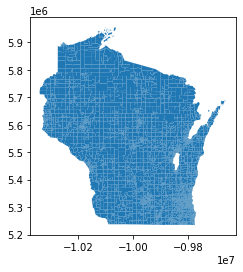

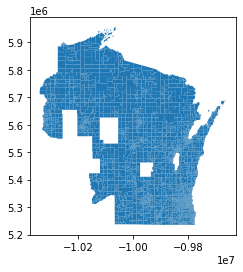

In [78]:
"""Need to drop these cases below
55077: marquette
55121: trempealeau
55091: pepin
55011: buffalo
55019: clark
55033: dunn
55043: grant
55063: lacross"""
print("Total ward count is: ", wards_subset.shape[0])
drop_marquette = drop_cases(wards_subset,'CNTY_FIPS','55077')
print("Total ward count is: ", drop_marquette.shape[0])
drop_trempealeau = drop_cases(drop_marquette, 'CNTY_FIPS','55121')
print("Total ward count is: ", drop_trempealeau.shape[0])
drop_pepin = drop_cases(drop_trempealeau, 'CNTY_FIPS', '55091')
print("Total ward count is: ", drop_pepin.shape[0])
drop_buffalo = drop_cases(drop_pepin,'CNTY_FIPS','55011')
print("Total ward count is: ", drop_buffalo.shape[0])
drop_clark = drop_cases(drop_buffalo, 'CNTY_FIPS', '55019')
print("Total ward count is: ", drop_clark.shape[0])
drop_dunn = drop_cases(drop_clark,'CNTY_FIPS','55033')
print("Total ward count is: ", drop_dunn.shape[0])
drop_grant = drop_cases(drop_dunn, 'CNTY_FIPS','55043')
print("Total ward count is: ", drop_grant.shape[0])
drop_lacross = drop_cases(drop_grant, 'CNTY_FIPS','55063')
print("Total ward count is: ", drop_lacross.shape[0])
wards_dropped_counties = drop_lacross
print("Ward count removed: ", wards_subset.shape[0] - wards_dropped_counties.shape[0] )
##Check to make sure that the data was removed
wards_subset.plot()
wards_dropped_counties.plot()

In [79]:
##Check the original precinct numbers for the shapefiles
marquette_row_count = marquette.shape[0]
trempealeau_row_count = trempealeau.shape[0]
pepin_row_count = pepin.shape[0]
buffalo_row_count = buffalo.shape[0]
clark_row_count = clark.shape[0]
dunn_row_count = dunn.shape[0]
grant_row_count = grant.shape[0]
lacross_row_count = lacross.shape[0]
add_counties_ward_count = marquette_row_count+trempealeau_row_count+pepin_row_count+buffalo_row_count+clark_row_count+dunn_row_count+grant_row_count+lacross_row_count
print(add_counties_ward_count)


479


In [80]:
##Before doing a union, we must set the projection to be the same for all of the datasets
proj = wards_dropped_counties.crs
wards = wards_dropped_counties.to_crs(proj)
marquette = marquette.to_crs(proj)
trempealeau = trempealeau.to_crs(proj)
pepin = pepin.to_crs(proj)
buffalo = buffalo.to_crs(proj)
clark = clark.to_crs(proj)
dunn = dunn.to_crs(proj)
grant = grant.to_crs(proj)
lacross = lacross.to_crs(proj)

In [81]:
lacross.head()

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,55,063,002823,La Crosse - C 0020,A,00,None,None,None,None,La Crosse - C 0020,90,N,None,G5240,"POLYGON Z ((-10155985.529 5434257.546 0.000, -..."
1,55,063,002824,La Crosse - C 0024,A,00,None,None,None,None,La Crosse - C 0024,90,N,None,G5240,"POLYGON Z ((-10155649.792 5433510.183 0.000, -..."
2,55,063,002825,La Crosse - C 0010,A,00,None,None,None,None,La Crosse - C 0010,90,N,None,G5240,"POLYGON Z ((-10157062.094 5436377.205 0.000, -..."
3,55,063,002827,La Crosse - C 0018,A,00,None,None,None,None,La Crosse - C 0018,90,N,None,G5240,"POLYGON Z ((-10156759.866 5434770.219 0.000, -..."
4,55,063,002829,La Crosse - C 0015,A,00,None,None,None,None,La Crosse - C 0015,90,N,None,G5240,"POLYGON Z ((-10157459.064 5434807.547 0.000, -..."


In [82]:
def subset_county_col(county):
    county=county[['NAMELSAD','geometry']]
    return county



In [83]:
pd.set_option('display.max_rows', None)#to view all columns in head
marquette_sub = subset_county_col(marquette)
trempealeau_sub = subset_county_col(trempealeau)
pepin_sub = subset_county_col(pepin)
buffalo_sub = subset_county_col(buffalo)
clark_sub = subset_county_col(clark)
dunn_sub = subset_county_col(dunn)
grant_sub = subset_county_col(grant)
lacross_sub =subset_county_col(lacross)

In [84]:
union1=gp.overlay(marquette_sub,trempealeau_sub,how='union')
union1.NAMELSAD.fillna(union1.NAMELSAD_1,inplace=True)
union1.NAMELSAD.fillna(union1.NAMELSAD_2,inplace=True)
del union1['NAMELSAD_1']
del union1['NAMELSAD_2']
union1['LABEL']=union1['NAMELSAD']
del union1['NAMELSAD']


<AxesSubplot:>

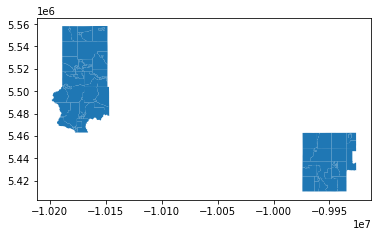

In [85]:
union2=gp.overlay(union1,pepin_sub,how='union')
union2.NAMELSAD.fillna(union2.LABEL,inplace=True)
union2['LABEL_TEST']=union2['NAMELSAD']
del union2['LABEL']
del union2['NAMELSAD']
union1.plot()

In [86]:
union2.head()

,geometry,LABEL_TEST
0,MULTIPOLYGON Z (((-9947147.204 5434034.817 0.0...,Montello - C 0002
1,"POLYGON Z ((-9944040.501 5433505.070 0.000, -9...",Montello - C 0003
2,"POLYGON Z ((-9944368.783 5431433.719 0.000, -9...",Montello - C 0004
3,"POLYGON Z ((-9960677.864 5423118.154 0.000, -9...",Endeavor - V 0001
4,"POLYGON Z ((-9974190.046 5415111.115 0.000, -9...",DOUGLAS - T 0001


In [87]:
union3=gp.overlay(union2,buffalo_sub,how='union')
union3.NAMELSAD.fillna(union3.LABEL_TEST,inplace=True)
union3['LABEL']=union3['NAMELSAD']
del union3['LABEL_TEST']
del union3['NAMELSAD']

<AxesSubplot:>

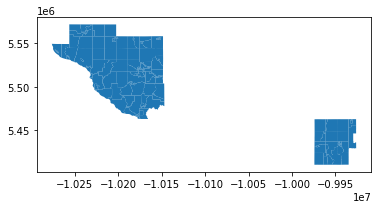

In [88]:
union3.plot()

In [89]:
union4=gp.overlay(union3,clark_sub,how='union')
union4.NAMELSAD.fillna(union4.LABEL,inplace=True)
union4['LABEL_TEST']=union4['NAMELSAD']
del union4['LABEL']
del union4['NAMELSAD']

In [90]:
union5=gp.overlay(union4,dunn_sub,how='union')
union5.NAMELSAD.fillna(union5.LABEL_TEST,inplace=True)
union5['LABEL']=union5['NAMELSAD']
del union5['LABEL_TEST']
del union5['NAMELSAD']
union5.head()

,geometry,LABEL
0,MULTIPOLYGON Z (((-9947147.204 5434034.817 0.0...,Montello - C 0002
1,"POLYGON Z ((-9944040.501 5433505.070 0.000, -9...",Montello - C 0003
2,"POLYGON Z ((-9944368.783 5431433.719 0.000, -9...",Montello - C 0004
3,"POLYGON Z ((-9960677.864 5423118.154 0.000, -9...",Endeavor - V 0001
4,"POLYGON Z ((-9974190.046 5415111.115 0.000, -9...",DOUGLAS - T 0001


In [91]:
union6=gp.overlay(union5,grant_sub,how='union')
union6.NAMELSAD.fillna(union6.LABEL,inplace=True)
union6['LABEL_TEST']=union6['NAMELSAD']
del union6['LABEL']
del union6['NAMELSAD']
union6.head()

,geometry,LABEL_TEST
0,MULTIPOLYGON Z (((-9947147.204 5434034.817 0.0...,Montello - C 0002
1,"POLYGON Z ((-9944040.501 5433505.070 0.000, -9...",Montello - C 0003
2,"POLYGON Z ((-9944368.783 5431433.719 0.000, -9...",Montello - C 0004
3,"POLYGON Z ((-9960677.864 5423118.154 0.000, -9...",Endeavor - V 0001
4,"POLYGON Z ((-9974190.046 5415111.115 0.000, -9...",DOUGLAS - T 0001


In [92]:
union7=gp.overlay(union6,lacross_sub,how='union')
union7.NAMELSAD.fillna(union7.LABEL_TEST,inplace=True)
union7['LABEL']=union7['NAMELSAD']
del union7['LABEL_TEST']
del union7['NAMELSAD']
counties_to_add=union7

In [93]:
"""Merge the data from the added counties 
based on label"""
add_counties_data = pd.merge(counties_to_add, wards_subset, on=['LABEL'], indicator=True, how='outer')


In [94]:
counties_to_add.head()

,geometry,LABEL
0,MULTIPOLYGON Z (((-9947147.204 5434034.817 0.0...,Montello - C 0002
1,"POLYGON Z ((-9944040.501 5433505.070 0.000, -9...",Montello - C 0003
2,"POLYGON Z ((-9944368.783 5431433.719 0.000, -9...",Montello - C 0004
3,"POLYGON Z ((-9960677.864 5423118.154 0.000, -9...",Endeavor - V 0001
4,"POLYGON Z ((-9974190.046 5415111.115 0.000, -9...",DOUGLAS - T 0001


In [95]:
x = wards_subset.CNTY_NAME
wards_sub_addCo = wards_subset[(x == 'Marquette') | (x=='Trempealeau')|(x=='Pepin')|(x=='Buffalo')|(x=='Clark')|(x=='Dunn')|(x=='Grant')|(x=='La Crosse')]




304

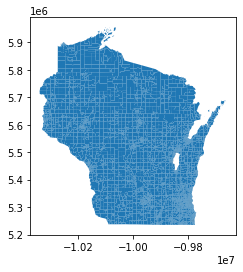

In [96]:
wi_full = gp.overlay(union7,wards_dropped_counties,how='union')
wi_full.plot()
abs(wi_full.shape[0]-final.shape[0])

In [97]:
print("wards in final: ", final.shape[0])
print("wards in raw: ",raw_wards.shape[0])
print("wards in subset: ", wards_subset.shape[0])
print("wards in add counties for RAW: ", wards_sub_addCo.shape[0])
print("wards in the added full wi: ", wi_full.shape[0])
print("wards in add counties NEW: ", counties_to_add.shape[0])

wards in final:  6975
wards in raw:  7078
wards in subset:  7078
wards in add counties for RAW:  481
wards in the added full wi:  7279
wards in add counties NEW:  479
